# Chapter 2: Training Basics - Book Examples

Examples and code snippets from the book

## Package version checks

In [42]:
import sys
sys.path.insert(0,'..')

In [43]:
# Import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set up plotting
plt.style.use('default')
sns.set_palette("husl")

In [44]:
import sys
print("Python path:", sys.executable)

Python path: /opt/anaconda3/envs/raschka-ml/bin/python


## Book Examples

Add your book examples here as you work through the chapter.

In [45]:
from python_environment_check import check_packages


d = {
    'numpy': '1.21.2',
    'matplotlib': '3.4.3',
    'pandas': '1.3.2'
}
check_packages(d)

[OK] numpy 1.21.2
[OK] matplotlib 3.4.3
[OK] pandas 1.3.2


In [46]:
import numpy as np
class Perceptron:
  """Perceptron classifier.
  
  
  Parameters
  ----------
  eta : float
      Learning rate (between 0.0 and 1.0)
  n_iter : int
      Passes over the training dataset. Also known as epochs.
  random_state : int
      Random number generator seed for random weight initialization.
  
  
  Attributes
  ----------
  w_ : 1d-array
      Weights after fitting.    
  errors_ : list
      Number of misclassifications (updates) in each epoch.
  b_ : Scalar
      Bias unit after fitting.
          
  """
  
  
  
  def __init__(self, eta=0.01, n_iter=50, random_state=1):
    self.eta = eta
    self.n_iter = n_iter
    self.random_state = random_state
    
    
  def fit(self, X, y):
    """Fit training data.
    
    Parameters
    ----------
    X : {array-like}, shape = [n_samples, n_features]
        Training vectors, where n_samples is the number of samples and
        n_features is the number of features.
    y : array-like, shape = [n_samples]
        Target values.
        
    Returns
    -------
    self : object
    
    """
    
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
    self.b_ = np.float_(0.)
    self.errors_ = []
    
    for _ in range(self.n_iter):
      errors = 0
      for xi, target in zip(X, y):
        update = self.eta * (target - self.predict(xi))
        self.w_ += update * xi
        self.b_ += update
        errors += int(update != 0.0)
      self.errors_.append(errors) #missclassifications are collected
    return self
  
  def net_input(self, X):
    """Calculate net input"""
    return np.dot(X, self.w_) + self.b_
  
  def predict(self, X):
    """Return class label after unit step"""
    return np.where(self.net_input(X) >= 0.0, 1, -1)
  

In [47]:
import os
import pandas as pd
from urllib.error import HTTPError

try:
    s = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
    print('From URL:', s)
    df = pd.read_csv(s, header=None, encoding='utf-8')
except HTTPError:
    s = 'iris.data'
    print('From local Iris path:', s)
    df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


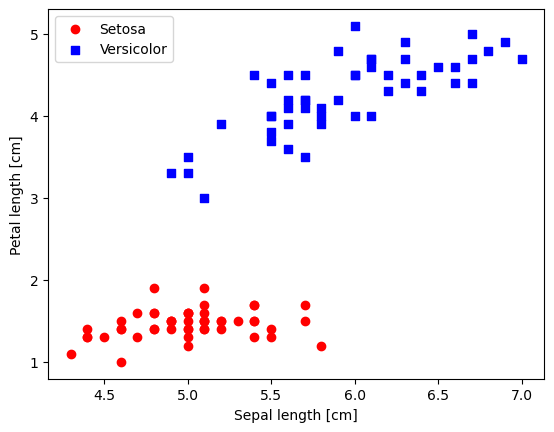

In [48]:
import matplotlib.pyplot as plt
import numpy as np

#select setosa and versicolor
y = df.iloc[0:100, 4].values #name of iris
y = np.where(y == 'Iris-setosa', -1, 1)
#extract sepal length and petal length
X = df.iloc[0:100, [0,2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100,1], color='blue', marker='s', label='Versicolor')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()



I had to adjust the np.where (y == 'Iris-setosa', -1, 1) to use -1 and 1. When I used 0,1 in the where() call, the perceptron was not converging. 

With using labels from book's example: (0, +1):
  - When actual=0, predicted=+1: update = 0.1 × (0 - 1) = -0.1 ✓
  - When actual=+1, predicted=+1: update = 0.1 × (1 - 1) = 0 ✓
  - When actual=0, predicted=-1: update = 0.1 × (0 - (-1)) = +0.1 ✓
  - When actual=+1, predicted=-1: update = 0.1 × (1 - (-1)) = +0.2
  
The missing symmetry for the last case was causing an issue. Changing the where() to use -1 and 1 fixed the convergence.

## Training the perceptron model

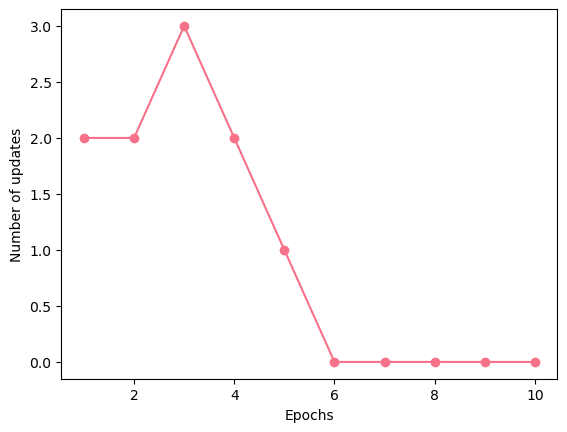

In [49]:
ppn = Perceptron(eta=0.1, n_iter=10)

ppn.fit(X, y)

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

# plt.savefig('images/02_07.png', dpi=300)
plt.show()

## A function for plotting decision regions

In [50]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.2):
  
  markers = ('o', 's', '^', 'v', '<')
  colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
  cmap = ListedColormap(colors[:len(np.unique(y))])
  
  x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
  lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
  lab = lab.reshape(xx1.shape)
  plt.contourf(xx1, xx2, lab, alpha=0.3, cmap=cmap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())
  
  for idx, cl in enumerate(np.unique(y)):
    plt.scatter(x=X[ y == cl, 0],
                y=X[y == cl, 1],
                alpha=0.8,
                c=colors[idx],
                marker=markers[idx],
                label=f'Class{cl}',
                edgecolor='black')
  

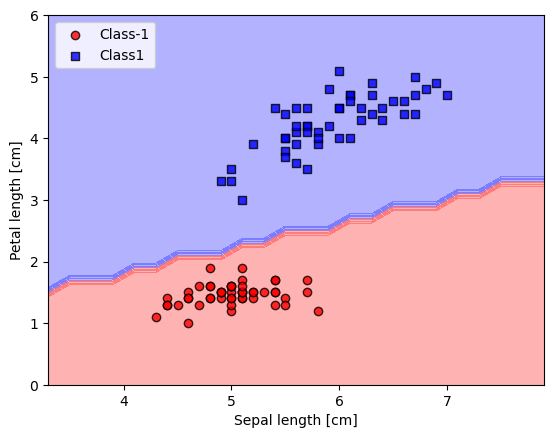

In [51]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')

plt.show()

# Plotting Explanation

  ## The Big Picture

  We want to create a plot that shows:
  1. **Background colors** = what the perceptron would predict for ANY point
  2. **Decision boundary** = the line where predictions change from one class to another
  3. **Actual data points** = your training data on top

  ---

  ## Step 1: Create a Grid of Test Points

  Think of this like creating a fine mesh or net over your entire plot area:

  ```python
  # Let's say your data ranges from:
  # Sepal length: 4.0 to 7.0
  # Petal length: 1.0 to 5.0

  x1_min, x1_max = 4.0, 7.0  # Sepal length range (with padding)
  x2_min, x2_max = 1.0, 5.0  # Petal length range (with padding)

  # Create arrays of evenly spaced points
  x1_points = [4.0, 4.2, 4.4, 4.6, 4.8, 5.0, ...]  # Every 0.2 units
  x2_points = [1.0, 1.2, 1.4, 1.6, 1.8, 2.0, ...]  # Every 0.2 units

  # np.meshgrid creates ALL COMBINATIONS of these points
  xx1, xx2 = np.meshgrid(x1_points, x2_points)

  What meshgrid does: Creates two grids where every (i,j) position represents one test
  point:

  # If x1_points = [4.0, 4.2, 4.4] and x2_points = [1.0, 1.2, 1.4]

  xx1 = [[4.0, 4.2, 4.4],    # Row 0: sepal length values
         [4.0, 4.2, 4.4],    # Row 1: same sepal length values  
         [4.0, 4.2, 4.4]]    # Row 2: same sepal length values

  xx2 = [[1.0, 1.0, 1.0],    # Row 0: petal length = 1.0 for all
         [1.2, 1.2, 1.2],    # Row 1: petal length = 1.2 for all
         [1.4, 1.4, 1.4]]    # Row 2: petal length = 1.4 for all

  The test points are:
  - Position (0,0): sepal=4.0, petal=1.0
  - Position (0,1): sepal=4.2, petal=1.0
  - Position (0,2): sepal=4.4, petal=1.0
  - Position (1,0): sepal=4.0, petal=1.2
  - ...and so on

  ---
  Step 2: Convert Grid to List of Points

  # Flatten the grids into 1D arrays
  xx1_flat = xx1.ravel()  # [4.0, 4.2, 4.4, 4.0, 4.2, 4.4, 4.0, 4.2, 4.4]
  xx2_flat = xx2.ravel()  # [1.0, 1.0, 1.0, 1.2, 1.2, 1.2, 1.4, 1.4, 1.4]

  # Stack them vertically then transpose
  points_array = np.array([xx1_flat, xx2_flat]).T

  # Result: each row is one test point [sepal_length, petal_length]
  points_array = [[4.0, 1.0],  # Test point 1
                  [4.2, 1.0],  # Test point 2
                  [4.4, 1.0],  # Test point 3
                  [4.0, 1.2],  # Test point 4
                  [4.2, 1.2],  # Test point 5
                  [4.4, 1.2],  # Test point 6
                  [4.0, 1.4],  # Test point 7
                  [4.2, 1.4],  # Test point 8
                  [4.4, 1.4]]  # Test point 9

  ---
  Step 3: Get Predictions for All Test Points

  # Ask the perceptron: "What class would you predict for each test point?"
  predictions = classifier.predict(points_array)

  # Example result: 
  predictions = [-1, -1, 1, -1, 1, 1, 1, 1, 1]
  #               ↑   ↑  ↑   ↑   ↑  ↑  ↑  ↑  ↑
  #              pt1 pt2 pt3 pt4 pt5 pt6 pt7 pt8 pt9

  What this means:
  - Test point 1 (4.0, 1.0) → Predicted class: -1 (Setosa)
  - Test point 2 (4.2, 1.0) → Predicted class: -1 (Setosa)
  - Test point 3 (4.4, 1.0) → Predicted class: +1 (Versicolor)
  - ...and so on

  ---
  Step 4: Reshape Back to Grid for Plotting

  # Convert the flat list back to the original grid shape
  predictions_grid = predictions.reshape(xx1.shape)

  # Result:
  predictions_grid = [[-1, -1,  1],    # Row 0: petal length 1.0
                      [-1,  1,  1],    # Row 1: petal length 1.2
                      [ 1,  1,  1]]    # Row 2: petal length 1.4

  ---
  Step 5: Plot the Results

  # Create a contour plot that colors regions based on predictions
  plt.contourf(xx1, xx2, predictions_grid, alpha=0.3, cmap=cmap)

  What contourf does:
  - Takes the grid coordinates (xx1, xx2) and the predictions
  - Colors each grid cell based on the prediction value
  - -1 predictions → Red regions
  - +1 predictions → Blue regions
  - The boundary between colors = decision boundary!

  # Finally, plot your actual training data on top
  for idx, cl in enumerate(np.unique(y)):
      plt.scatter(x=X[y == cl, 0],      # Sepal length for this class
                  y=X[y == cl, 1],      # Petal length for this class  
                  alpha=0.8,
                  c=colors[idx],         # Color for this class
                  marker=markers[idx],   # Shape for this class
                  label=f'Class{cl}')    # Legend label

  ---
  The Final Result

  You get a plot where:
  - Red background = "If a flower had these measurements, I'd predict Setosa"
  - Blue background = "If a flower had these measurements, I'd predict Versicolor"
  - Boundary line = Where the perceptron switches its prediction
  - Actual dots = Your real training data points

  This shows you visually how well your perceptron learned to separate the two types of
  flowers!
  ```

